# Лабораторная работа №1 
# Построение и исследование характеристик датчиков базовых случайных величин

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Метод середины квадрата

In [2]:
def square_mid_sensor(n=5, z0=90909090, digit_amount=8, is_float=True):
    assert n >= 0, "`n` should not be negative"
    assert len(str(z0)) == digit_amount, f"`z0` Should be {digit_amount}-digit number"
    
    generated_nums = []
    next_num = str(z0)
    for _ in range(n):
        next_num = str(int(next_num) ** 2)
        if len(next_num) < 2 * digit_amount:
            next_num = next_num.zfill(2*digit_amount)
        slice_len = len(next_num) // 2
        next_num = next_num[slice_len//2:-slice_len//2]
        generated_nums.append(float("0." + next_num) if is_float else int(next_num))
    return generated_nums

In [3]:
square_mid_sensor(n=5)

[0.46264462, 0.40044414, 0.5550926, 0.27794574, 0.53834384]

## Мультипликативный конгруэнтный метод

In [4]:
def multiplicative_congruent_sensor(n=20, 
                                    a0=19941994, 
                                    k=(2**32)-5, 
                                    m=2**64, 
                                    float_round=8):
    assert a0 >= 0, "`a0` should not be negative"
    assert m >= 0, "`m` should not be negative"
    
    generated_nums = []
    next_a = a0
    for _ in range(n):
        next_a = (k * next_a) % m
        generated_nums.append(round(next_a / m, float_round))
    return generated_nums

In [5]:
multiplicative_congruent_sensor(n=5)

[0.00464311, 0.95356893, 0.34823305, 0.67844635, 0.50971031]

## Тестирование равномерности

### Построение гистограмм

In [6]:
def get_frequencies(z, k, n):
    step = 1 / k
    arange = np.arange(0, 1 + step, step)
    z_n = [0 for _ in range(k)]
    for index, (i, j) in enumerate(zip(arange, arange[1:])):
        for el in z:
            if i <= el <= j:
                z_n[index] += 1
    return arange, [i/n for i in z_n]

In [7]:
def draw_plot(x_orig, y_orig, title="", is_plot_show=True):
    x = x_orig[:]
    y = y_orig[:]
    y.insert(0, 0)
    plt.step(x, y)
    plt.vlines(x, min(y), y, colors='C0')
    plt.grid(True)
    plt.suptitle(title, fontweight='bold')
    if is_plot_show:
        plt.show()

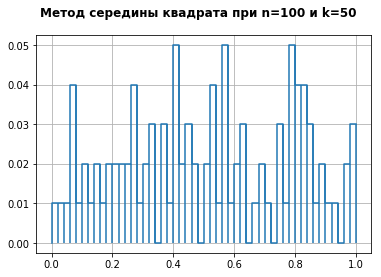

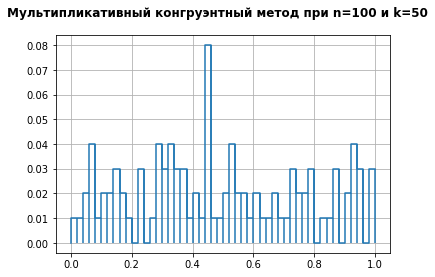

In [23]:
k = 50
n = 100

z0 = square_mid_sensor(n=n)
z1 = multiplicative_congruent_sensor(n=n)

x0, p0 = get_frequencies(z0, k, n)
x1, p1 = get_frequencies(z1, k, n)

draw_plot(x0, p0, title=f"Метод середины квадрата при n={n} и k={k}")
draw_plot(x1, p1, title=f"Мультипликативный конгруэнтный метод при n={n} и k={k}")

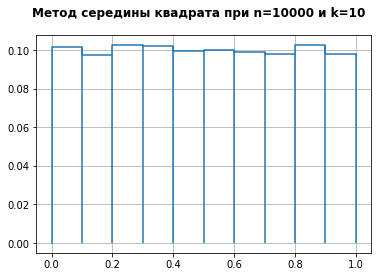

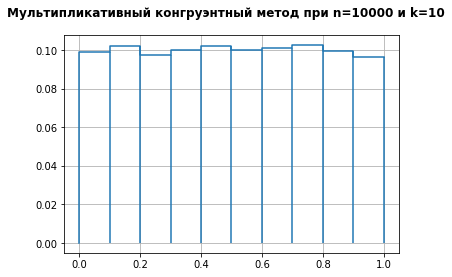

In [9]:
k = 10
n = 10000

z0 = square_mid_sensor(n=n)
z1 = multiplicative_congruent_sensor(n=n)

x0, p0 = get_frequencies(z0, k, n)
x1, p1 = get_frequencies(z1, k, n)

draw_plot(x0, p0, title=f"Метод середины квадрата при n={n} и k={k}")
draw_plot(x1, p1, title=f"Мультипликативный конгруэнтный метод при n={n} и k={k}")

По гистограммам видно, что во втором случае столбцы ближе к значению: $$\frac{1}{k}$$

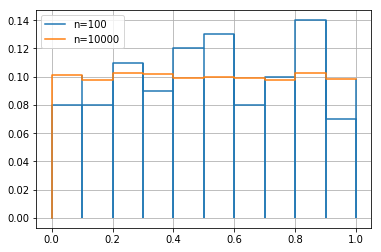

In [10]:
k = 10
n1 = 100
n2 = 10000
z0 = square_mid_sensor(n=n1)
z1 = square_mid_sensor(n=n2)

x0, p0 = get_frequencies(z0, k, n1)
x1, p1 = get_frequencies(z1, k, n2)

draw_plot(x0, p0, is_plot_show=False)
draw_plot(x1, p1, is_plot_show=False)
plt.legend((f"n={n1}", f"n={n2}"))
plt.show()

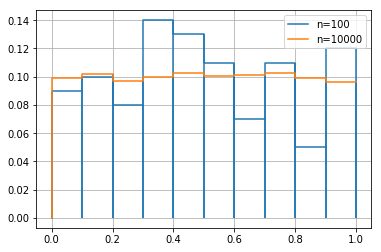

In [11]:
k = 10
n1 = 100
n2 = 10000
z0 = multiplicative_congruent_sensor(n=n1)
z1 = multiplicative_congruent_sensor(n=n2)

x0, p0 = get_frequencies(z0, k, n1)
x1, p1 = get_frequencies(z1, k, n2)

draw_plot(x0, p0, is_plot_show=False)
draw_plot(x1, p1, is_plot_show=False)
plt.legend((f"n={n1}", f"n={n2}"))
plt.show()

### Вычисление мат. ожидания и дисперсии

In [12]:
def get_mathematical_expectation(func, n):
    z = func(n=n)
    return sum(z) / n

In [13]:
def get_variance(func, n):
    m = get_mathematical_expectation(func, n)
    z = func(n=n)
    return sum(i**2 - m**2 for i in z) / n

In [14]:
def print_some(what, func, n):
    print(f"При n={n}:", what(func, n))

Теоритическое мат. ожидание $$ M(z) = 0.5 $$

In [15]:
print("Метод середины квадрата")
print_some(get_mathematical_expectation, square_mid_sensor, n=100)
print_some(get_mathematical_expectation, square_mid_sensor, n=10000)

Метод середины квадрата
При n=100: 0.5116753875
При n=10000: 0.4986047677690005


In [16]:
print("Мультипликативный конгруэнтный метод")
print_some(get_mathematical_expectation, multiplicative_congruent_sensor, n=100)
print_some(get_mathematical_expectation, multiplicative_congruent_sensor, n=10000)

Мультипликативный конгруэнтный метод
При n=100: 0.4922854331999998
При n=10000: 0.49932376641400034


Теоритическая дисперсия $$ D(z) = 0.833333... $$

In [17]:
print("Метод середины квадрата")
print_some(get_variance, square_mid_sensor, n=100)
print_some(get_variance, square_mid_sensor, n=10000)

Метод середины квадрата
При n=100: 0.07592014729023194
При n=10000: 0.0831485314607909


In [18]:
print("Мультипликативный конгруэнтный метод")
print_some(get_variance, multiplicative_congruent_sensor, n=100)
print_some(get_variance, multiplicative_congruent_sensor, n=10000)

Мультипликативный конгруэнтный метод
При n=100: 0.07862842551145854
При n=10000: 0.08261330374336037


## Тестирование независимости

Посчитаем коэффициент корреляции. При уведичении $n$ коэффициент должен сходится к $0$

In [19]:
def get_correlation_coefficient(method, n=10000, s=5):
    z = method(n=n)
    x, y = z[:-s], z[s:]
    M_x = sum(x) / n
    D_x = sum(i**2 - M_x**2 for i in x) / n
    M_y = sum(y) / n
    D_y = sum(i**2 - M_y**2 for i in y) / n
    M_xy = sum(i * j for i, j in zip(x, y)) / n
    return (M_xy - (M_x*M_y)) / np.sqrt(D_x*D_y)

In [20]:
def print_correlation_coefficient(method, n):
    print(f"R(x, y) = {get_correlation_coefficient(method, n=n)}, при n={n}")

In [21]:
print("Метод середины квадрата")
print_correlation_coefficient(square_mid_sensor, n=100)
print_correlation_coefficient(square_mid_sensor, n=10000)

Метод середины квадрата
R(x, y) = 0.05630627505421508, при n=100
R(x, y) = -0.0003799862186775813, при n=10000


In [22]:
print("Мультипликативный конгруэнтный метод")
n = 100
print_correlation_coefficient(multiplicative_congruent_sensor, n)
n = 10000
print_correlation_coefficient(multiplicative_congruent_sensor, n)

Мультипликативный конгруэнтный метод
R(x, y) = 0.09604279133581228, при n=100
R(x, y) = -0.005910065605539842, при n=10000
